I Venkata Sai Kuniganti declare that I/We have completed this computer code in accordance with the UAB Academic Integrity Code and the UAB CS Honor Code. I have read the UAB Academic Integrity Code and understand that any breach of the Code may result in severe penalties. 

Student signature(s)/initials: Venakata Sai Kuniganti 

Date: 02/28/2024 

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as trn
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tftTs_2
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as p

(tTr_X, tTr_X2), (tTs_Y, tTs_2) = cifar10.load_data()
tTr_X, tTs_Y = tTr_X / 255.0, tTs_Y / 255.0




In [2]:
train_img1 = torch.tensor(tTr_X, dtype=torch.float32)
train_lbl1 = torch.tensor(tTr_X2, dtype=torch.long)
test_img1 = torch.tensor(tTs_Y, dtype=torch.float32)
test_lbl1 = torch.tensor(tTs_2, dtype=torch.long)

train_ds1 = TensorDataset(train_img1, train_lbl1)
train_ldr1 = DataLoader(train_ds1, batch_size=4, shuffle=True, num_workers=2)


In [3]:

class PretrainedModel(nn.Module):
    def __init__(self):
        super(PretrainedModel, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the inut
        x = torch.relu(self.fc1(x))   # Apply ReLU activation
        x = self.fc2(x)               # Output layer
        return x


In [4]:

net1 = PretrainedModel()

crit1 = nn.CrossEntropyLoss() 
opt1 = optim.SGD(net1.parameters(), lr=0.01, momentum=0.9)


test_ds1 = TensorDataset(test_img1, test_lbl1)
test_ldr1 = DataLoader(test_ds1, batch_size=4, shuffle=False, num_workers=2)


In [5]:

losses1 = []
for epoch1 in range(5):
    run_loss1 = 0.0
    for i1, data1 in enumerate(train_ldr1, 0):
      
        ipt1, lbl1 = data1
        opt1.zero_grad()
        out1 = net1(ipt1)
        lbl1 = lbl1.squeeze()
        
        loss1 = crit1(out1, lbl1) 
        loss1.backward()  
        opt1.step()  


        run_loss1 += loss1.item()
        if i1 % 5000 == 4999:  
            print('[%d, %5d] loss: %.3f' % (epoch1 + 1, i1 + 1, run_loss1 / 5000))
            losses1.append(run_loss1 / 5000)
            run_loss1 = 0.0


[1,  5000] loss: 2.309
[1, 10000] loss: 2.308
[2,  5000] loss: 2.307
[2, 10000] loss: 2.308
[3,  5000] loss: 2.308
[3, 10000] loss: 2.307
[4,  5000] loss: 2.309
[4, 10000] loss: 2.308
[5,  5000] loss: 2.308
[5, 10000] loss: 2.308


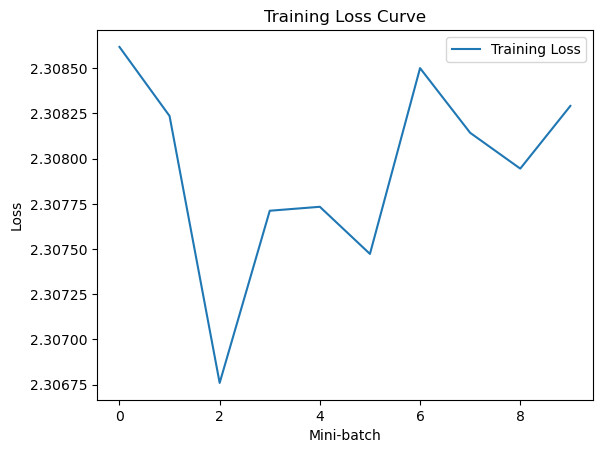

In [6]:

p.plot(losses1, label='Training Loss')
p.xlabel('Mini-batch')
p.ylabel('Loss')
p.title('Training Loss Curve')
p.legend()
p.show()


In [7]:
# Evaluate the model on the test set
corr1 = 0
tot1 = 0
with torch.no_grad():
    for data1 in test_ldr1:
        img1, lbl1 = data1
        out1 = net1(img1)
        _, pred1 = torch.max(out1.data, 1)
        tot1 += lbl1.size(0)
        corr1 += (pred1 == lbl1).sum().item()


In [8]:

print('Accuracy of the network on the 10000 test img: %d %%' % (100 * corr1 / tot1))


Accuracy of the network on the 10000 test img: 40 %


In [9]:
import time
import numpy as n
import matplotlib.pyplot as p
from tensorflow.keras.datasets import cifar10


In [10]:
def load_data():
    data = cifar10.load_data()
    Tr_X = data[0]
    Ts_Y = data[1]
    Tr_X, Tr_X2 = Tr_X[0], Tr_X[1]
    Ts_Y, Ts_2 = Ts_Y[0], Ts_Y[1]
    List_classes = ['AIRPLANE', 'AUTOMOBILE', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']

    Tr_X = Tr_X.reshape(Tr_X.shape[0], -1).astype('float') / 255
    Ts_Y = Ts_Y.reshape(Ts_Y.shape[0], -1).astype('float') / 255

    Ts_3 = n.eye(len(List_classes))[Tr_X2.flatten()]
    Ts_4 = n.eye(len(List_classes))[Ts_2.flatten()]

    return Tr_X, Ts_Y, Ts_3, Ts_4


In [11]:
import matplotlib.pyplot as plot
import numpy as n
def display_dataset():
    Dataset_CIFAR10 = cifar10.load_data()
    training_dataset = Dataset_CIFAR10[0]
    test_dataset = Dataset_CIFAR10[1]
    inut_Training = training_dataset[0]
    output_training = training_dataset[1]
    
    inut_Testing = test_dataset[0]
    output_testing = test_dataset[1]
    List_classes = ['AIRPLANE', 'AUTOMOBILE', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']
    plot.figure(figsize=(12, 26))
    
    for class_index in range(10):
        indices = n.where(output_testing == class_index)[0][:6]  
        img, names = inut_Testing[indices], output_testing[indices]
    
        plot.subplot(10, 7, class_index * 7 + 1)
        plot.text(0.5, 0.5, List_classes[class_index].upper(), fontsize=13, ha='center', va='center')
        plot.axis('off')
    
        for t in range(6):
            plot.subplot(10, 7, class_index * 7 + 2 + t)
            plot.imshow(img[t])
            plot.title(List_classes[names[t][0]].lower() +" - "+ str(t+1))
            plot.axis('off')
    
    plot.tight_layout()
    plot.show()

In [12]:

def ini_par(inp_siz, hid_siz, out_siz):
    n.random.seed(0)
    wei1 = n.random.randn(inp_siz, hid_siz) 
    wei1 *= 0.01
    bia1 = n.zeros((1, hid_siz))
    wei2 = n.random.randn(hid_siz, out_siz) * 0.01
    wei2 *= 0.01
    bia2 = n.zeros((1, out_siz))
    return wei1, bia1, wei2, bia2




In [13]:
# Function to perform forward propagation
def forward_prop(inut_data, w1, b1, w2, b2):
    hli = n.dot(inut_data, w1) + b1
    hlo = n.maximum(0, hli) 
    oli = n.dot(hlo, w2) + b2
    exp_s = n.exp(oli)
    probs = exp_s / n.sum(exp_s, axis=1, keepdims=True)
    return hli, hlo, oli, probs

# Function to perform backward propagation with L2 regularization
def backward_propagation_with_regularization(inut_data, Ts_3, weights_1, weights_2, activ_1, probs, lambda_reg):
    data_l = len(inut_data)
    dz_two = probs - Ts_3
    d = (1 / data_l)
    flag = True
    
    dw_two =  d * n.dot(activ_1.T, dz_two) 
    dw_two += (lambda_reg / data_l) * weights_2
    db_two = d * n.sum(dz_two, axis=0, keepdims=flag)
    
    da_one = n.dot(dz_two, weights_2.T)
    
    dz_one = da_one * (activ_1 > 0)
    
    dw_one = d * n.dot(inut_data.T, dz_one) 
    dw_one += (lambda_reg * d) * weights_1
    
    db_one = d * n.sum(dz_one, axis=0, keepdims=flag)
    
    return dw_one, db_one, dw_two, db_two


In [14]:
def updt_wts_bs(wght1, bias1, wght2, bias2, dW1, db1, dW2, db2, lr, lmbd):
    wght1 = wght1 -  lr * (dW1 + lmbd * wght1)
    bias1 = bias1 - lr * db1
    wght2 = wght2 - lr * (dW2 + lmbd * wght2)
    bias2 = bias2 - lr * db2
    return wght1, bias1, wght2, bias2


In [15]:
def fit(Tr_X, Ts_3, inut_size, output_size, lr, hidden_size, num_iters, lambda_reg):
    wght1, bs1, wght2, bs2 = ini_par(inut_size, hidden_size, output_size)
    train_acc_hist = []
    train_ls_hist = []
    print(f'Learning Rate: {lr}, Hidden Size: {hidden_size}, Regularization: {lambda_reg}')

    for i in range(num_iters):
        Z1, A1, Z2, probs = forward_prop(Tr_X, wght1, bs1, wght2, bs2)
        loss = -n.sum(n.log(probs) * Ts_3) / len(Tr_X)


        regularization_term = (lambda_reg / (2 * len(Tr_X))) * (n.sum(n.square(wght1)) + n.sum(n.square(wght2)))
        loss += regularization_term

        train_ls_hist.append(loss)

        dWeights1, dbiases1, dWeights2, dbiases2 = backward_propagation_with_regularization(Tr_X, Ts_3, wght1, wght2, A1, probs, lambda_reg)
        wght1, bs1, wght2, bs2 = updt_wts_bs(wght1, bs1, wght2, bs2, dWeights1, dbiases1, dWeights2, dbiases2, lr, lambda_reg)

        train_predictions = n.argmax(probs, axis=1)
        accuracy = n.mean(train_predictions == n.argmax(Ts_3, axis=1))
        train_acc_hist.append(accuracy)

        if i % 100 == 0:
            print(f'Iteration: {i}/{num_iters}, Loss: {loss}, Accuracy: ~ {int(accuracy*100)}%')

    return wght1, bs1, wght2, bs2, train_acc_hist, train_ls_hist

In [16]:
def evaluate_model(Ts_Y, Ts_4, wght1, bs1, wght2, bs2):
    Z1_test, A1_test, Z2_test, probs_test = forward_prop(Ts_Y, wght1, bs1, wght2, bs2)
    ts_preds = n.argmax(probs_test, axis=1)
    Ts_acc = n.mean(ts_preds == n.argmax(Ts_4, axis=1))
    print(f'Test Accuracy: {Ts_acc}')
    return Ts_acc

In [17]:
def plot_training_history(train_acc_hist, train_ls_hist):
    iterations = len(train_acc_hist)
    p.figure(figsize=(10, 6))
    p.plot(range(iterations), train_acc_hist, color='blue')
    p.title('Training Accuracy over Iterations')
    p.xlabel('Iterations')
    p.ylabel('Accuracy')
    p.grid(True)
    p.show()

    p.figure(figsize=(10, 6))
    p.plot(range(iterations), train_ls_hist, color='red')
    p.title('Training Loss over Iterations')
    p.xlabel('Iterations')
    p.ylabel('Loss')
    p.grid(True)
    p.show()

In [18]:

def display_runtime(start_time):
    end_time = time.time()
    runtime_seconds = end_time - start_time
    runtime_minutes = runtime_seconds / 60
    print(f"Total runtime: {runtime_seconds} seconds ({runtime_minutes} minutes)")


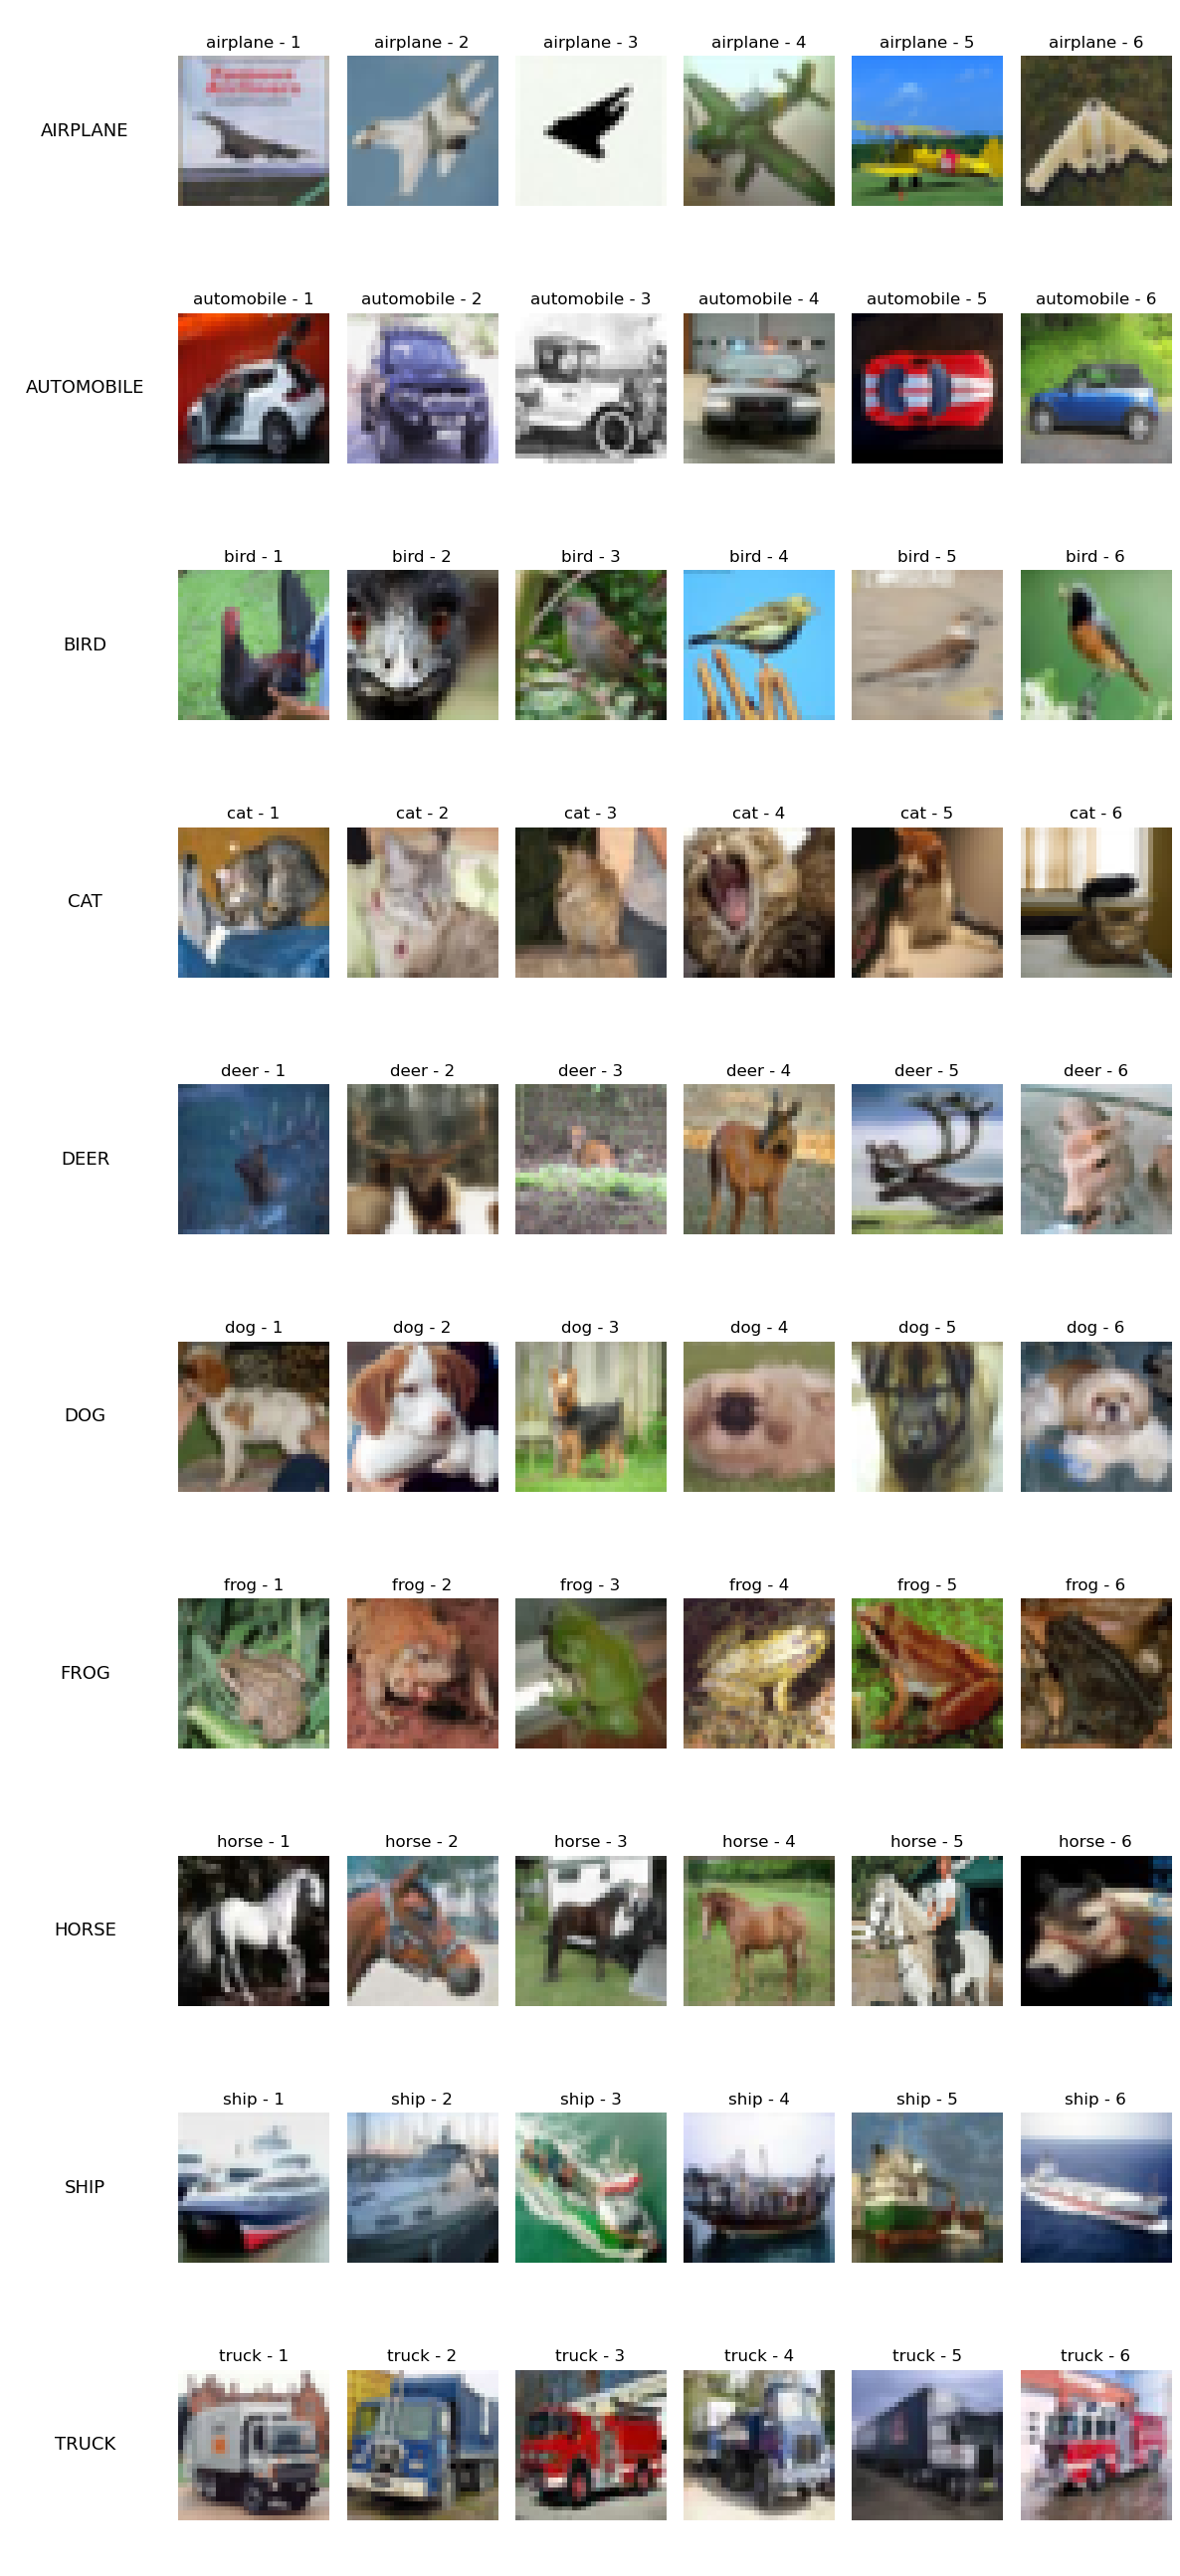

In [19]:

start_time = time.time()
display_dataset()
tra_data, tes_data, Ts_3, Ts_4 = load_data()

in_size = 32 * 32 * 3
O_size = 10
num_iters = 150

list_Learning_Rates = [0.001,0.01,0.1]
list_hidd_sizes = [50,100,200]
List_reg_vals = [0.01,0.1]

Top_acc = 0
best_hyperparameters = None

In [20]:
for lr in list_Learning_Rates:
    for hidd_size in list_hidd_sizes:
        for lamb_reg in List_reg_vals:

            wght1, bs1, wght2, bs2, train_acc_hist, train_ls_hist = fit(tra_data, Ts_3, in_size, O_size, lr, hidd_size, num_iters, lamb_reg)
            

            Ts_acc = evaluate_model(tes_data, Ts_4, wght1, bs1, wght2, bs2)
            
            if Ts_acc > Top_acc:
                Top_acc = Ts_acc
                best_hyperparameters = (lr, hidd_size, lamb_reg)

Learning Rate: 0.001, Hidden Size: 50, Regularization: 0.01
Iteration: 0/150, Loss: 2.3025898781050502, Accuracy: ~ 9%
Iteration: 100/150, Loss: 2.3023191482167666, Accuracy: ~ 9%
Test Accuracy: 0.1
Learning Rate: 0.001, Hidden Size: 50, Regularization: 0.1
Iteration: 0/150, Loss: 2.3026036308900206, Accuracy: ~ 9%
Iteration: 100/150, Loss: 2.3023373086203596, Accuracy: ~ 9%
Test Accuracy: 0.1
Learning Rate: 0.001, Hidden Size: 100, Regularization: 0.01
Iteration: 0/150, Loss: 2.302587430515775, Accuracy: ~ 11%
Iteration: 100/150, Loss: 2.3020307090746823, Accuracy: ~ 10%
Test Accuracy: 0.1
Learning Rate: 0.001, Hidden Size: 100, Regularization: 0.1
Iteration: 0/150, Loss: 2.302615022211729, Accuracy: ~ 11%
Iteration: 100/150, Loss: 2.302067487510205, Accuracy: ~ 10%
Test Accuracy: 0.1
Learning Rate: 0.001, Hidden Size: 200, Regularization: 0.01
Iteration: 0/150, Loss: 2.3025893801786377, Accuracy: ~ 10%
Iteration: 100/150, Loss: 2.301454686383049, Accuracy: ~ 10%
Test Accuracy: 0.1
Le

In [21]:
best_lr, best_hidd_size, best_lamb_reg = best_hyperparameters
print(f"Best Hyperparameters: Learning Rate: {best_lr}, Hidden Size: {best_hidd_size}, Lambda: {best_lamb_reg}, Best Accuracy: {Top_acc}")


Best Hyperparameters: Learning Rate: 0.1, Hidden Size: 100, Lambda: 0.01, Best Accuracy: 0.2988


In [22]:
num_iters = 800
weights1_best, biases1_best, weights2_best, biases2_best, train_acc_hist, train_ls_hist = fit(tra_data, Ts_3, in_size, O_size, best_lr, best_hidd_size, num_iters, best_lamb_reg)


Learning Rate: 0.1, Hidden Size: 100, Regularization: 0.01
Iteration: 0/800, Loss: 2.302587430515775, Accuracy: ~ 11%
Iteration: 100/800, Loss: 2.022848309023838, Accuracy: ~ 25%
Iteration: 200/800, Loss: 1.9826082439596733, Accuracy: ~ 29%
Iteration: 300/800, Loss: 1.8688627754220308, Accuracy: ~ 33%
Iteration: 400/800, Loss: 1.8237865544439058, Accuracy: ~ 34%
Iteration: 500/800, Loss: 1.787852928521874, Accuracy: ~ 35%
Iteration: 600/800, Loss: 1.778608982915764, Accuracy: ~ 36%
Iteration: 700/800, Loss: 1.7330942808907557, Accuracy: ~ 38%


In [23]:
Ts_acc = evaluate_model(tes_data, Ts_4, weights1_best, biases1_best, weights2_best, biases2_best)


Test Accuracy: 0.3734


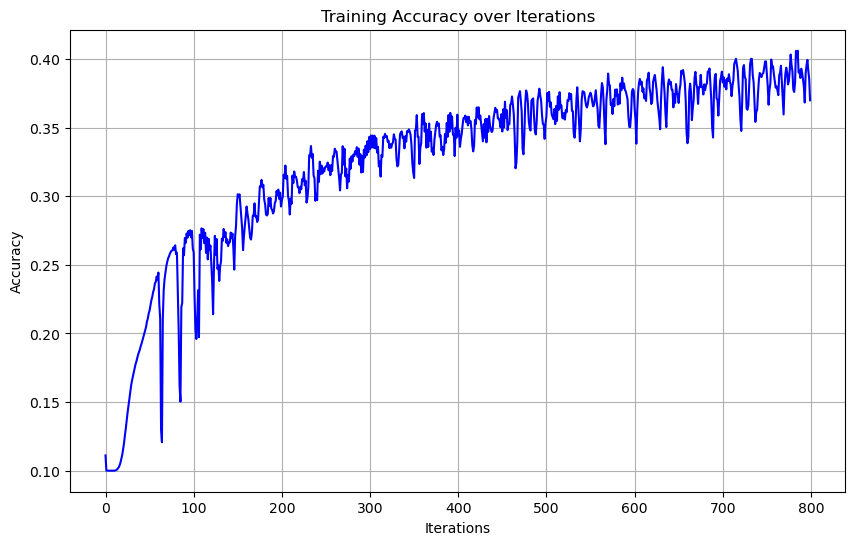

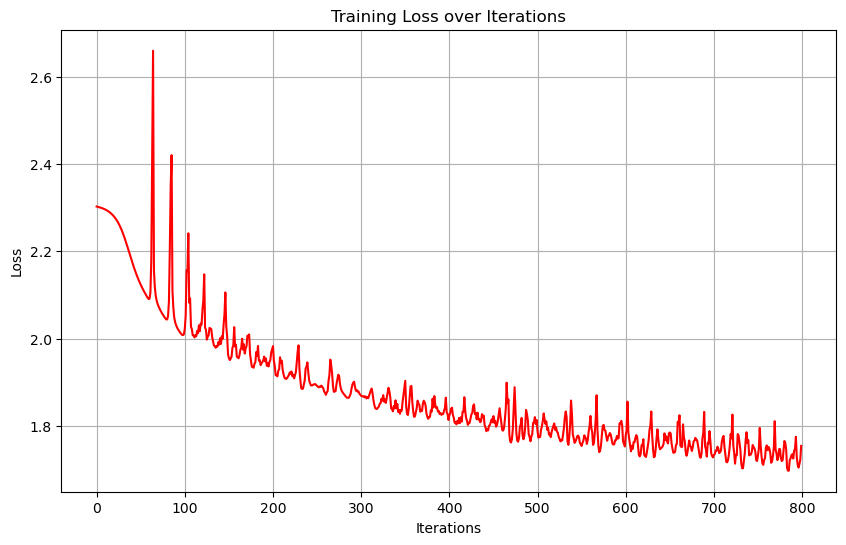

In [24]:
plot_training_history(train_acc_hist, train_ls_hist)

In [25]:
display_runtime(start_time)

Total runtime: 3270.9593920707703 seconds (54.51598986784617 minutes)
